In [14]:
import pandas as pd 
import numpy as np

In [15]:
df = pd.read_csv('data.csv')

In [16]:
df

,text,summary
0,daman diu administration wednesday withdrew ci...,administration union territory daman diu revok...
1,"special numbers tv?appearances, bollywood acto...",malaika arora slammed instagram user trolled d...
2,indira gandhi institute medical sciences patna...,indira gandhi institute medical sciences patna...
3,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...
4,hotels mumbai indian cities train staff spot s...,hotels maharashtra train staff spot signs sex ...
...,...,...
4391,"mumbai, feb fruit juice concentrate maker rasn...",fruit juice concentrate maker rasna eyeing rev...
4392,former cricketer sachin tendulkar spotted rajy...,former indian cricketer sachin tendulkar atten...
4393,"aamir khan, whose last film dangal told story ...","aamir khan, talking reality shows television f..."
4394,maharahstra power minister chandrashekhar bawa...,maharashtra government initiated inquiry -year...


In [17]:
example_sentence = df.iloc[0,0]
example_sentence

'daman diu administration wednesday withdrew circular asked women staff tie rakhis male colleagues order triggered backlash employees ripped apart social media.the union territory?s administration forced retreat within hours issuing circular made compulsory staff celebrate rakshabandhan workplace.?it decided celebrate festival rakshabandhan august . connection, offices/ departments shall remain open celebrate festival collectively suitable time wherein lady staff shall tie rakhis colleagues,? order, issued august gurpreet singh, deputy secretary , said.to ensure one skipped office, attendance report sent government next evening.the two notifications ? one mandating celebration rakshabandhan withdrawing mandate ? issued daman diu administration day apart. circular withdrawn one-line order issued late evening ut?s department personnel administrative reforms.?the circular ridiculous. sensitivities involved. government dictate tie rakhi to? maintain professionalism workplace? official told

In [18]:
# avg length of summary column

length = df['summary'].apply(lambda x: len(x.split()))
avg_length = np.mean(length)
avg_length

35.57279344858963

In [19]:
#avg length of text column

length = df['text'].apply(lambda x: len(x.split()))
avg_length = np.mean(length)
avg_length

# we find that summary column is approximately 20 % of the text column

201.287534121929

In [20]:
# importing summa library for summarization
# summa is based on textrank algorithm which is an extractive summarization technique
# it calculates the importance of a sentence based on the importance of the words in the sentence


from summa import summarizer

# initializing the summarizer , with ratio = 0.2 , which means the summary will be 20% of the original text
summary = summarizer.summarize(example_sentence, ratio=0.2 , language='english')

summary



'daman diu administration wednesday withdrew circular asked women staff tie rakhis male colleagues order triggered backlash employees ripped apart social media.the union territory?s administration forced retreat within hours issuing circular made compulsory staff celebrate rakshabandhan workplace.?it decided celebrate festival rakshabandhan august .\nrefused identified.the notice issued daman diu administrator former gujarat home minister praful kodabhai patel?s direction, sources said.rakshabandhan, celebration bond brothers sisters, one several hindu festivities rituals longer confined private, family affairs become tools push politic al ideologies.in , year bjp stormed power centre, rashtriya swayamsevak sangh chief mohan bhagwat said festival ?national significance?'

In [21]:
#building pipeline for summarization of all the text in the dataset

def summarize_text(text):
    return summarizer.summarize(text, ratio=0.2, language='english')

df['generated_summary'] = df['text'].apply(summarize_text)

df

,text,summary,generated_summary
0,daman diu administration wednesday withdrew ci...,administration union territory daman diu revok...,daman diu administration wednesday withdrew ci...
1,"special numbers tv?appearances, bollywood acto...",malaika arora slammed instagram user trolled d...,"special numbers tv?appearances, bollywood acto..."
2,indira gandhi institute medical sciences patna...,indira gandhi institute medical sciences patna...,indira gandhi institute medical sciences patna...
3,lashkar-e-taiba's kashmir commander abu dujana...,lashkar-e-taiba's kashmir commander abu dujana...,"dujana, managed give security forces slip seve..."
4,hotels mumbai indian cities train staff spot s...,hotels maharashtra train staff spot signs sex ...,"rising property prices, traditional red light ..."
...,...,...,...
4391,"mumbai, feb fruit juice concentrate maker rasn...",fruit juice concentrate maker rasna eyeing rev...,company invested rs crore far vitos plans expo...
4392,former cricketer sachin tendulkar spotted rajy...,former indian cricketer sachin tendulkar atten...,
4393,"aamir khan, whose last film dangal told story ...","aamir khan, talking reality shows television f...","aamir khan, whose last film dangal told story ..."
4394,maharahstra power minister chandrashekhar bawa...,maharashtra government initiated inquiry -year...,bhosle received similar bills past bungalow re...


In [22]:
# calculating rouge scores of the generated summary

from sumeval.metrics.rouge import RougeCalculator

rouge = RougeCalculator(stopwords=True, lang="en")



In [23]:
# calculating rouge scores of the generated summary
def rouge_calc(preds, targets):
    rouge_1 = [rouge.rouge_n(summary=preds[i],references=targets[i],n=1) for i in range(len(preds))]
    
    rouge_2 = [rouge.rouge_n(summary=preds[i],references=targets[i],n=2) for i in range(len(preds))]
    
    rouge_l = [rouge.rouge_l(summary=preds[i],references=targets[i]) for i in range(len(preds))]
    # get the average of the rouge scores
    return {"Rouge_1": np.array(rouge_1).mean(),
            
            "Rouge_2": np.array(rouge_2).mean(),
            
            "Rouge_L": np.array(rouge_l).mean()}

In [25]:
rouge_calc(list(df['generated_summary']), list(df['summary']))

{'Rouge_1': 0.2598418492010122,
 'Rouge_2': 0.12002228311211788,
 'Rouge_L': 0.19699924793967336}

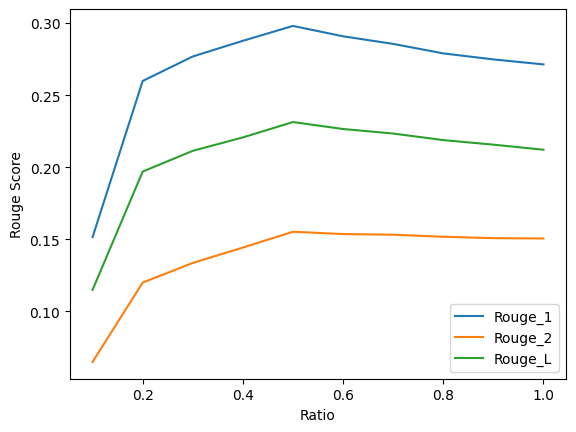

In [26]:
# graph of rouge scores vs ratio in summarizer , to find the best ratio

import matplotlib.pyplot as plt

# array of 0.1 to 1 with 10 values
ratios = np.linspace(0.1, 1, 10)

rouge_1 = []
rouge_2 = []
rouge_l = []

# for each ratio in ratios calculate the rouge scores
for ratio in ratios:
    df['generated_summary'] = df['text'].apply(lambda x: summarizer.summarize(x, ratio=ratio, language='english'))
    # calculate rouge scores
    rouge_scores = rouge_calc(list(df['generated_summary']), list(df['summary']))
    
    rouge_1.append(rouge_scores['Rouge_1'])
    
    rouge_2.append(rouge_scores['Rouge_2'])
    
    rouge_l.append(rouge_scores['Rouge_L'])

#   plot the graph
    
plt.plot(ratios, rouge_1, label='Rouge_1')

plt.plot(ratios, rouge_2, label='Rouge_2')

plt.plot(ratios, rouge_l, label='Rouge_L')

plt.xlabel('Ratio')

plt.ylabel('Rouge Score')

plt.legend()

plt.show()


# we find that the best ratio is between 0.2 to 0.4  for this dataset after that it declines 


In [27]:
ratios

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])